In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus']=False
pd.set_option('max_columns',100)

In [445]:
from sklearn.utils import shuffle
df = pd.read_csv('AllData.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df = shuffle(df)
df.head(500)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Lo Salary,Hi Salary,Expected Salary,Area,State,Lo Em,Hi Em,Lo Rev,Hi Rev,BS_R,BS_E
3978,DataEngineer,$74K-$134K (Glassdoor est.),Where good people build rewarding careers.\n\n...,3.4,Allstate,"Irving, TX","Northbrook, IL",10000+,1931,Company - Public,Insurance Agencies & Brokerages,Insurance,10000000000,"Progressive Insurance, State Farm, Farmers Ins...",-1,74000,134000,104000.0,Irving,TX,10000,-1,10000000000,10000000000,Large,Other
8184,DataScientist,$82K-$129K(Employer est.),Position Summary\n\nSamsung Austin Semiconduct...,2.9,Samsung Austin Semiconductor,"Austin, TX","Austin, TX","1001,5000",1996,Subsidiary or Business Segment,Electrical & Electronic Manufacturing,Manufacturing,Unknown,"GLOBALFOUNDRIES, Intel Corporation, TSMC",-1,82000,129000,105500.0,Austin,TX,1001,5000,-1,-1,Large,Large
1014,DataAnalyst,$46K-$102K (Glassdoor est.),KAYGEN is an emerging leader in providing top ...,3.9,Kaygen Inc.,"Phoenix, AZ","Irvine, CA","1,50",-1,Company - Private,Consulting,Business Services,"1000000,5000000",-1,-1,46000,102000,74000.0,Phoenix,AZ,1,50,1000000,5000000,Small,Small
4248,DataEngineer,$100K-$181K (Glassdoor est.),Mercari is the selling app. We make it super e...,2.7,Mercari,"Palo Alto, CA","Tokyo, Japan","1001,5000",2013,Company - Private,Internet,Information Technology,Unknown,-1,True,100000,181000,140500.0,Palo Alto,CA,1001,5000,-1,-1,Large,Large
8077,DataScientist,$93K-$151K (Glassdoor est.),Job Description\nData Analyst\n\nAbout our cli...,4.9,Cypress HCM,"Austin, TX","Walnut Creek, CA","51,200",2005,Company - Private,Staffing & Outsourcing,Business Services,Unknown,-1,-1,93000,151000,122000.0,Austin,TX,51,200,-1,-1,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,DataEngineer,$70K-$138K (Glassdoor est.),MUST HAVE REQUIREMENT prior experience with De...,5.0,Global Force USA,"Phoenix, AZ","Houston, TX","1,50",-1,Company - Private,Accounting,Accounting & Legal,Less than1000000,-1,-1,70000,138000,104000.0,Phoenix,AZ,1,50,-1,1000000,Micro,Small
8573,DataScientist,$52K-$94K (Glassdoor est.),Tiger Analytics is an advanced analytics consu...,4.6,Tiger Analytics,"Columbus, OH","Santa Clara, CA","201,500",2011,Company - Private,Consulting,Business Services,"10000000,25000000","Mu Sigma, LatentView Analytics, Fractal",-1,52000,94000,73000.0,Columbus,OH,201,500,10000000,25000000,Medium,Large
4225,DataEngineer,$108K-$127K (Glassdoor est.),"Posted: May 22, 2020\nRole Number:\n200172180\...",4.1,Apple,"Santa Clara, CA","Cupertino, CA",10000+,1976,Company - Public,Computer Hardware & Software,Information Technology,10000000000,"Google, Microsoft, Samsung Electronics",-1,108000,127000,117500.0,Santa Clara,CA,10000,-1,10000000000,10000000000,Large,Other
2503,DataEngineer,$95K-$167K (Glassdoor est.),Job Description\nData Engineer\n\nBigtime Ente...,-1.0,ingenium.agency,"Los Angeles, CA",Unknown,Unknown,-1,-1,Unknown,Unknown,Unknown,-1,-1,95000,167000,131000.0,Los Angeles,CA,-1,-1,-1,-1,Other,Other


In [446]:
x_df = df[['Job Title', 'State', 'Area', 'Company Name']]
y_df = df['Expected Salary']

In [447]:
x_df

,Job Title,State,Area,Company Name
3978,DataEngineer,TX,Irving,Allstate
8184,DataScientist,TX,Austin,Samsung Austin Semiconductor
1014,DataAnalyst,AZ,Phoenix,Kaygen Inc.
4248,DataEngineer,CA,Palo Alto,Mercari
8077,DataScientist,TX,Austin,Cypress HCM
...,...,...,...,...
578,DataAnalyst,CA,Long Beach,LEAPROS
6545,DataScientist,PA,Philadelphia,Adaptimmune
4555,DataEngineer,FL,Jacksonville,Humana
6962,DataScientist,CA,San Diego,Abbott Laboratories


In [448]:
y_df

3978    104000.0
8184    105500.0
1014     74000.0
4248    140500.0
8077    122000.0
          ...   
578      80000.0
6545     82500.0
4555     60500.0
6962     92000.0
5555     98000.0
Name: Expected Salary, Length: 8690, dtype: float64

In [449]:
from sklearn.preprocessing import LabelEncoder
x_df = x_df.apply(LabelEncoder().fit_transform)
x_df

,Job Title,State,Area,Company Name
3978,1,15,140,176
8184,2,15,15,2628
1014,0,0,226,1667
4248,1,1,218,1928
8077,2,15,15,837
...,...,...,...,...
578,0,1,166,1731
6545,2,13,225,103
4555,1,4,145,1438
6962,2,1,254,69


## Linear Regression

In [450]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.4, random_state=17)

In [451]:
from sklearn import metrics

def print_evaluation(t, p):
    mae = metrics.mean_absolute_error(t, p)
    mse = metrics.mean_squared_error(t, p)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(t, p)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)

def evaluate(t, p):
    mae = metrics.mean_absolute_error(t, p)
    mse = metrics.mean_squared_error(t, p)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(t, p)
    return mae,mse,rmse,r2

In [452]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train, y_train)

LinearRegression(normalize=True)

In [453]:
print(lin_reg.intercept_)

81304.06805630175


In [454]:
coeff_df = pd.DataFrame(lin_reg.coef_, x_df.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Job Title,17766.387082
State,-1444.695370
Area,32.723814
Company Name,0.322136


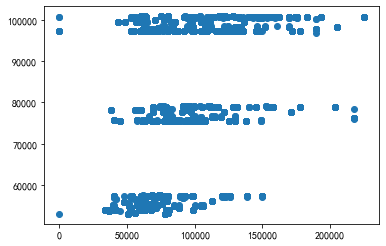

In [455]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

pred = lin_reg.predict(x_test)
plt.scatter(y_test, pred)

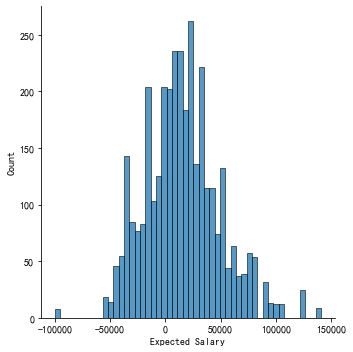

In [456]:
sns.displot((y_test - pred), bins=50)

In [457]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('test set evaluation:\n')
print_evaluation(y_test, test_pred)
print('========================================')
print('train set evaluation:\n')
print_evaluation(y_train, train_pred)

test set evaluation:

MAE:  28753.210668441374
MSE:  1392383480.819868
RMSE:  37314.65504087996
R2:  -0.039367303919775276
train set evaluation:

MAE:  28485.033725630517
MSE:  1354496780.0552542
RMSE:  36803.48869407973
R2:  -0.002982637684880496


In [458]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred


evaluate_df = pd.DataFrame(data=[['Linear Regression', *evaluate(y_test, test_pred), cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'Cross Validation'])

evaluate_df

,Model,MAE,MSE,RMSE,R2,Cross Validation
0,Linear Regression,28753.210668,1.392383e+09,37314.655041,-0.039367,"[0.24236148500517785, 0.1882864971041004, 0.24..."


## Polynomial Regression

In [459]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=6)

x_train_pr = poly_reg.fit_transform(x_train)
x_test_pr = poly_reg.transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train_pr, y_train)

test_pred = lin_reg.predict(x_test_pr)
train_pred = lin_reg.predict(x_train_pr)

print('test set evaluation:\n')
print_evaluation(y_test, test_pred)
print('========================================')
print('train set evaluation:\n')
print_evaluation(y_train, train_pred)

test set evaluation:

MAE:  22323.531501726124
MSE:  843963611.4725258
RMSE:  29051.051813532085
R2:  0.37000963057527303
train set evaluation:

MAE:  21898.121451860377
MSE:  810551815.1884949
RMSE:  28470.191695675232
R2:  0.39979968239949537


## Random Forest

In [460]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=700, min_samples_leaf=20)
rf_reg.fit(x_train, y_train)

test_pred = rf_reg.predict(x_test)
train_pred = rf_reg.predict(x_train)

print('test set evaluation:\n')
print_evaluation(y_test, test_pred)
print('========================================')
print('train set evaluation:\n')
print_evaluation(y_train, train_pred)

test set evaluation:

MAE:  21242.09395325713
MSE:  770761809.3824905
RMSE:  27762.597309734738
R2:  0.4246523067693264
train set evaluation:

MAE:  20168.35540955199
MSE:  692872943.389708
RMSE:  26322.479810794957
R2:  0.48693895579940216


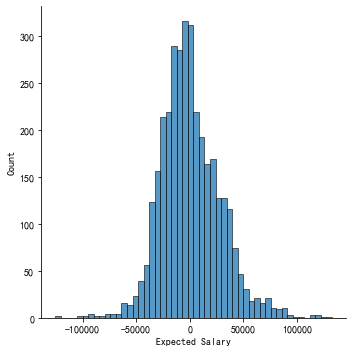

In [461]:
sns.displot((y_test - test_pred), bins=50)

In [462]:
evaluate_df = pd.DataFrame(data=[['RF', *evaluate(y_test, test_pred), cross_val(RandomForestRegressor())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'Cross Validation'])

evaluate_df

,Model,MAE,MSE,RMSE,R2,Cross Validation
0,RF,21242.093953,7.707618e+08,27762.59731,0.424652,"[0.32839565260521786, 0.2649266682146547, 0.28..."


## Gradient boost

In [463]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=17)

In [464]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1500,
          'max_depth': 5,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(x_train, y_train)

test_pred = gb_reg.predict(x_test)
train_pred = gb_reg.predict(x_train)

print('test set evaluation:\n')
print_evaluation(y_test, test_pred)
print('========================================')
print('train set evaluation:\n')
print_evaluation(y_train, train_pred)

test set evaluation:

MAE:  20918.18986160454
MSE:  786266947.7557298
RMSE:  28040.45198914828
R2:  0.4116786149508157
train set evaluation:

MAE:  18613.87884179166
MSE:  623584783.8897142
RMSE:  24971.679636935
R2:  0.5381098434327718


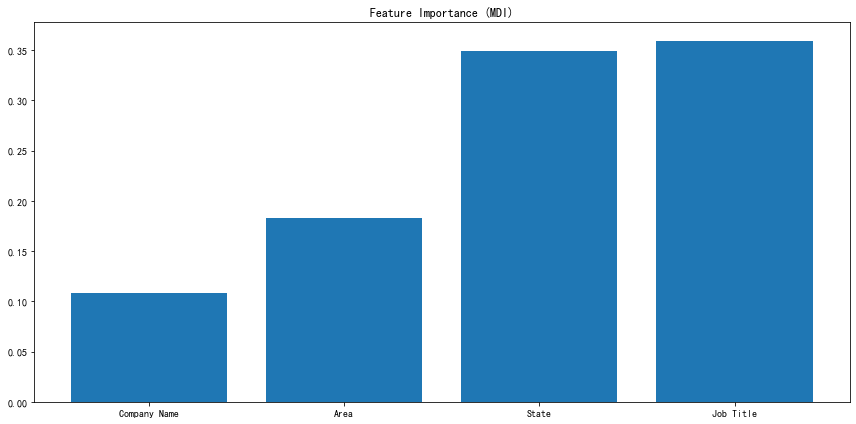

In [465]:
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.bar(pos, feature_importance[sorted_idx], align='center')
plt.xticks(pos, np.array(x_df.columns)[sorted_idx])
ax.set_title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()